# See how to use the attention masks as input to the model

In [1]:
from PIL import Image
import os


test_data_root_dir = 'test_data/attention_t01_route00_clearnoon'

def open_image(img_name: str) -> Image.Image:
    img = Image.open(os.path.join(os.getcwd(), test_data_root_dir, img_name))
    if 'virtual_attention' in img_name:
        return img.convert('L')
    return img.convert('RGB')

img_paths_dict = {
    'rgb_central': [open_image('rgb_central000517.png')],
    'rgb_left': [open_image('rgb_left000517.png')],
    'rgb_right': [open_image('rgb_right000517.png')],
    'virtual_attention_central_': [open_image('virtual_attention_central_000517.jpg')],
    'virtual_attention_left_': [open_image('virtual_attention_left_000517.jpg')],
    'virtual_attention_right_': [open_image('virtual_attention_right_000517.jpg')],
}

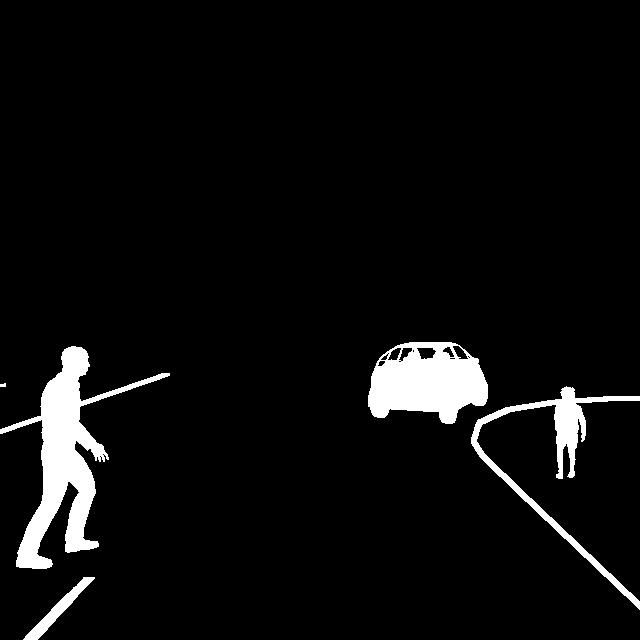

In [9]:
img_paths_dict['virtual_attention_central_'][0]

In [10]:
# Part of the transforms pipeline
import cv2
import numpy as np
import torchvision.transforms.functional as TF

img = img_paths_dict['virtual_attention_central_'][0]
img = cv2.resize(np.array(img), (10, 10), interpolation=cv2.INTER_AREA)
img = TF.to_tensor(img)

In [14]:
img.sum()

tensor(5.2118)

In [77]:
img = img_paths_dict['virtual_attention_central_'][0]
img = cv2.resize(np.array(img), (300, 300), interpolation=cv2.INTER_AREA)
img = TF.to_tensor(img)
att_channel = TF.normalize(img, [0.5], [0.5])

In [76]:
img.std()

tensor(0.4289)

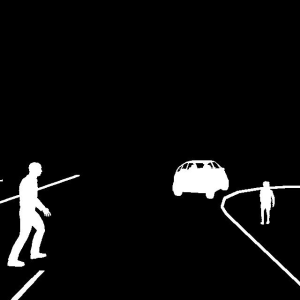

In [32]:
Image.fromarray((255 * img.squeeze().numpy()).astype(np.uint8))

In [78]:
img = img_paths_dict['rgb_central'][0]
img = cv2.resize(np.array(img), (300, 300), interpolation=cv2.INTER_AREA)
img = TF.to_tensor(img)
rgb = TF.normalize(img, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])


In [80]:
att_channel.shape

torch.Size([1, 300, 300])

In [82]:
import torch

torch.cat((rgb, att_channel)).shape

torch.Size([4, 300, 300])

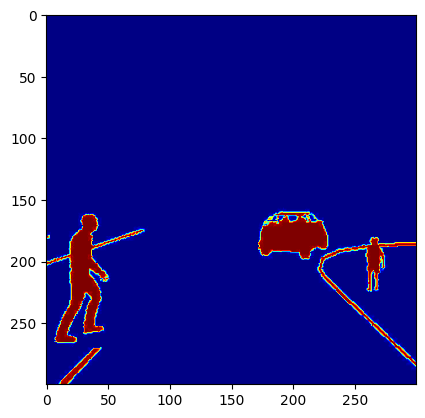

In [89]:
import matplotlib.pyplot as plt

# plt.imshow((255 * rgb.squeeze().numpy().transpose(1, 2, 0)).astype(np.uint8))
plt.imshow((255 * att_channel.squeeze().numpy()).astype(np.uint8), cmap='jet')


In [90]:
batch1 = torch.cat((rgb, att_channel)).unsqueeze(0)

In [91]:
batch1.shape

torch.Size([1, 4, 300, 300])

In [93]:
from network.models.building_blocks.resnet_FM import resnet34

model = resnet34(pretrained=True, layer_id=4, num_input_channels=4)

In [97]:
out = model(batch1)

In [100]:
out[0].shape

torch.Size([1, 512, 10, 10])

In [103]:
for i in out[1]:
    print(i.shape)

torch.Size([1, 64, 150, 150])
torch.Size([1, 64, 75, 75])
torch.Size([1, 128, 38, 38])
torch.Size([1, 256, 19, 19])
torch.Size([1, 512, 10, 10])
